In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
df=pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

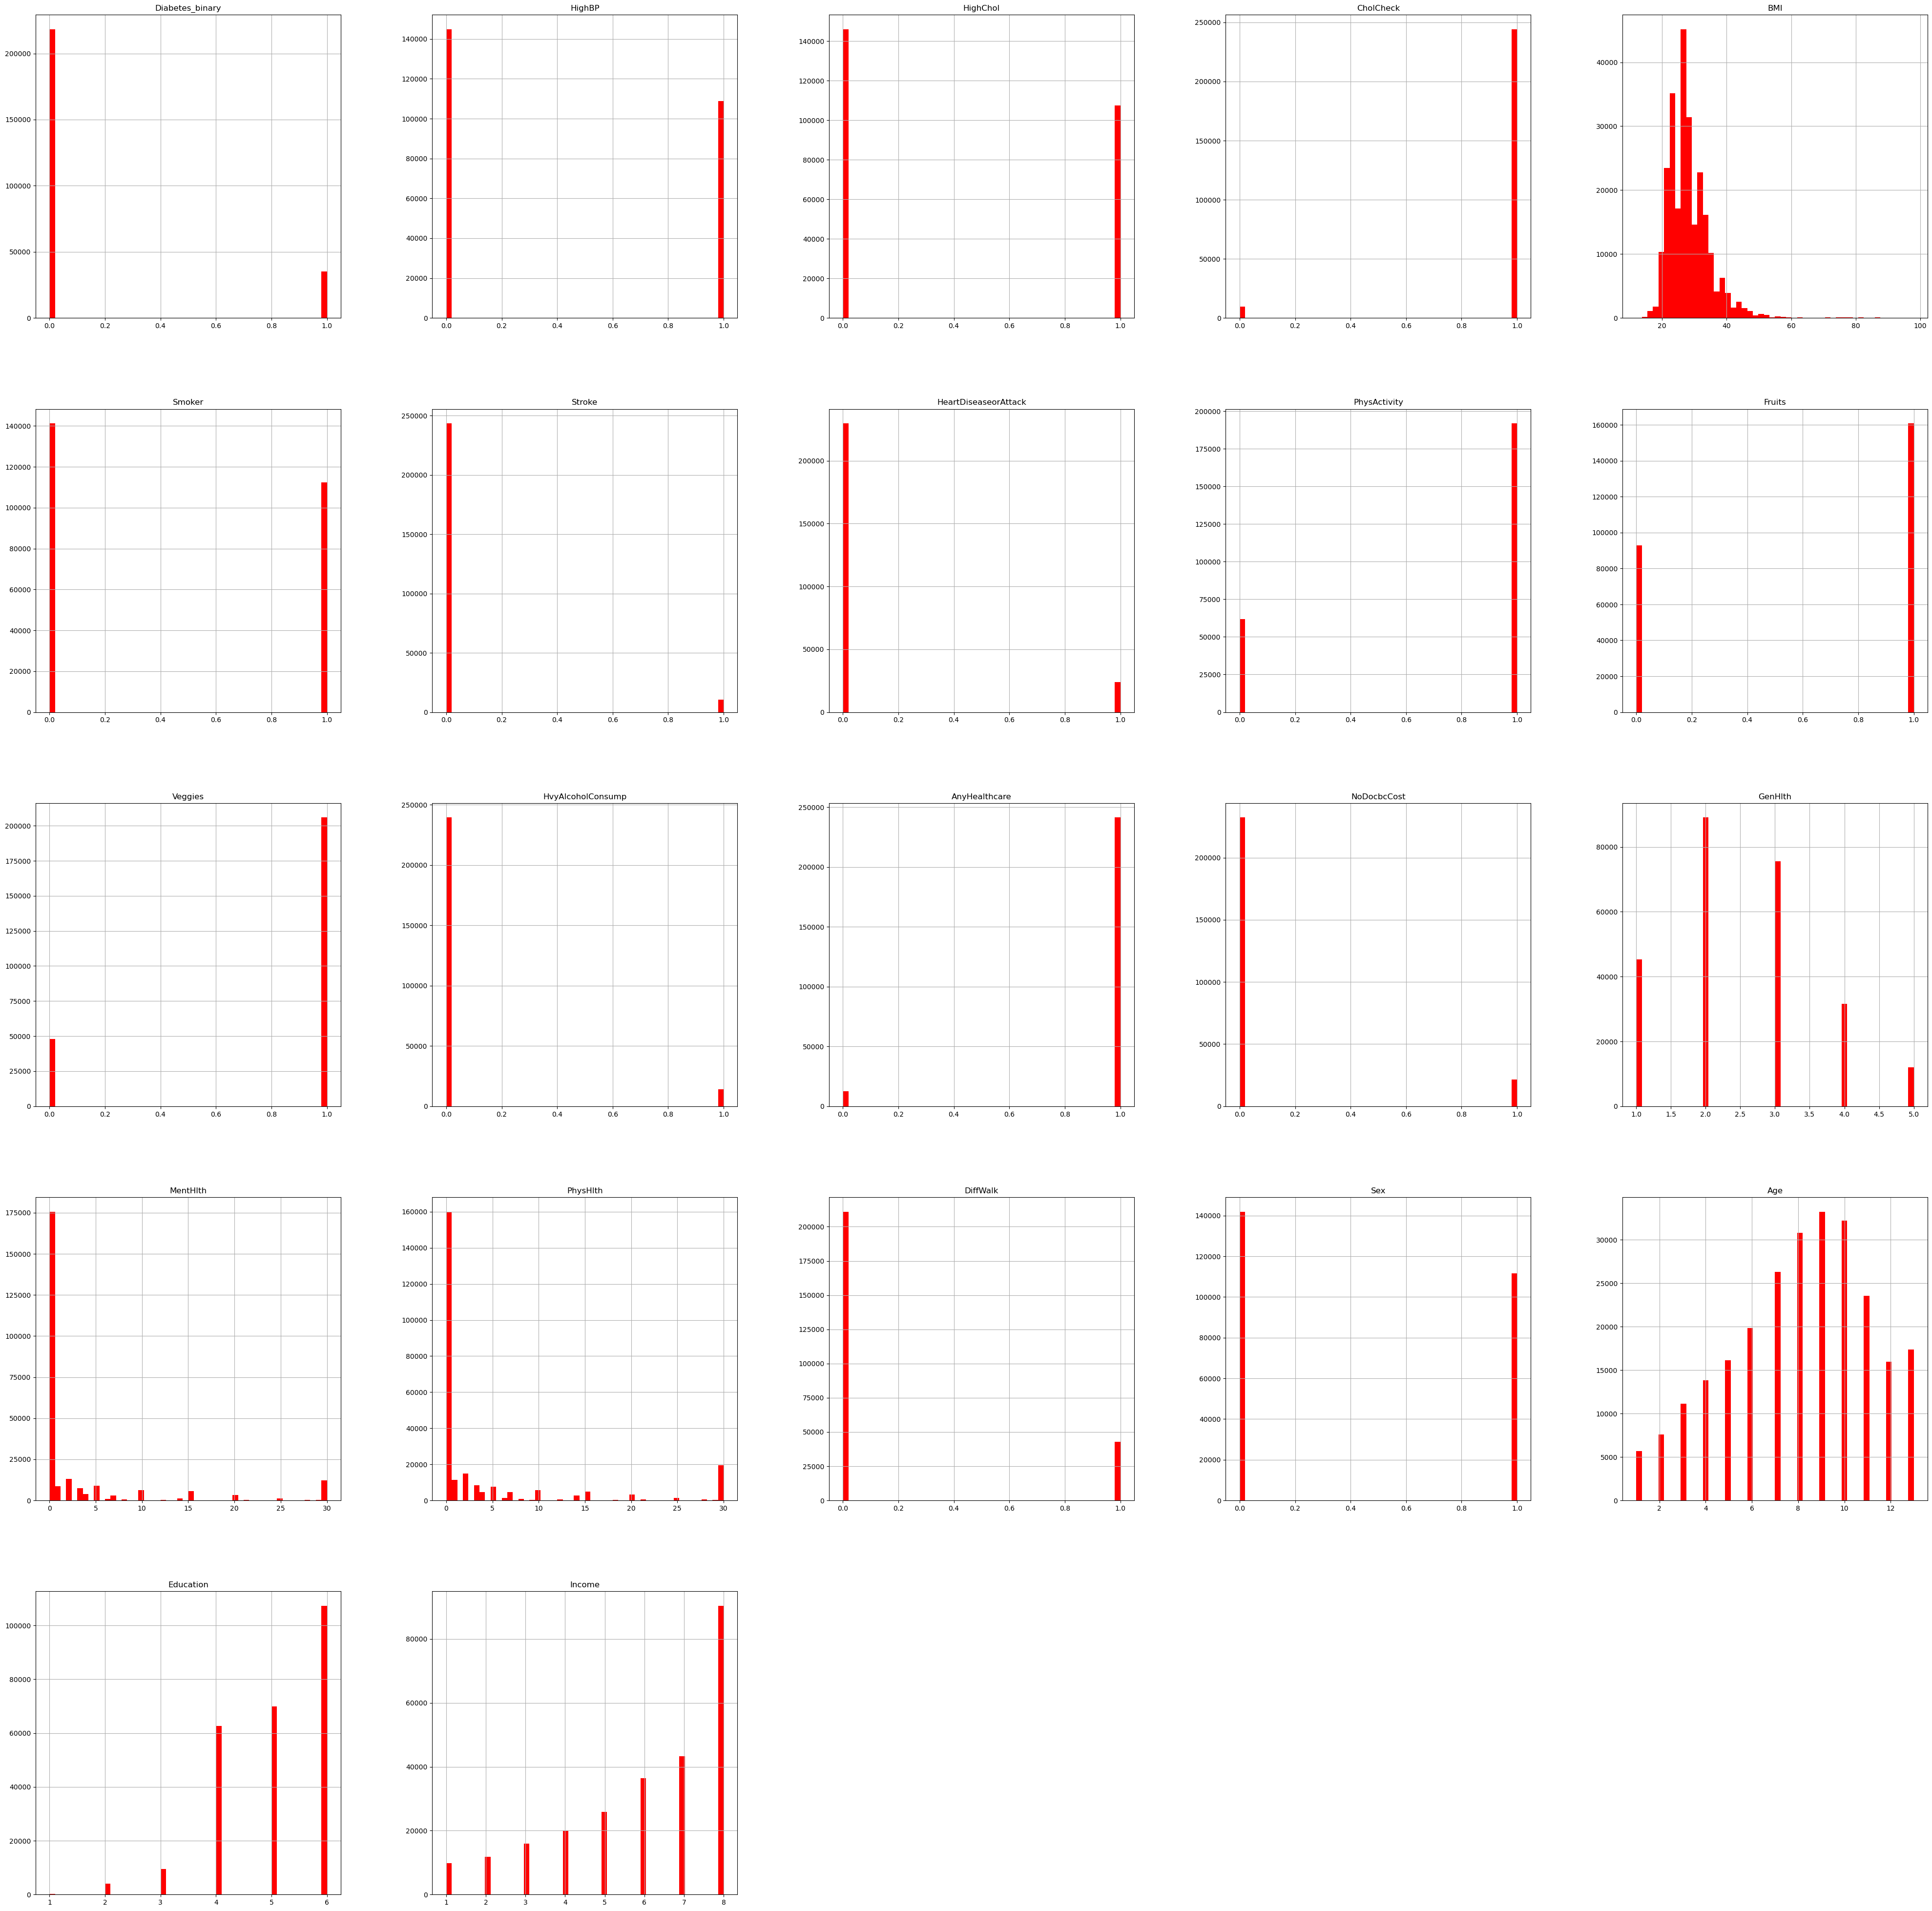

In [7]:
df.hist(figsize=(50,50),bins=50,color='red')

<Axes: ylabel='Frequency'>

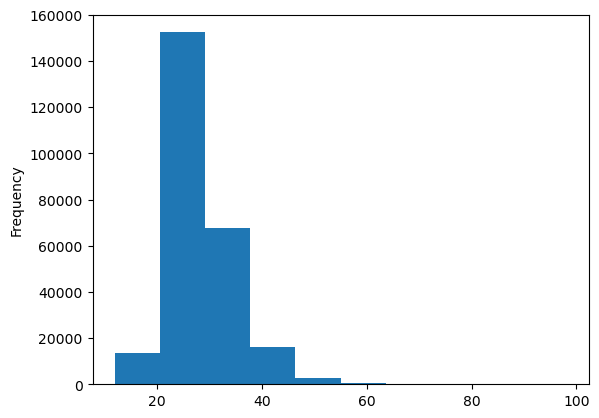

In [9]:
df['BMI'].plot(kind='hist')

<Axes: ylabel='Frequency'>

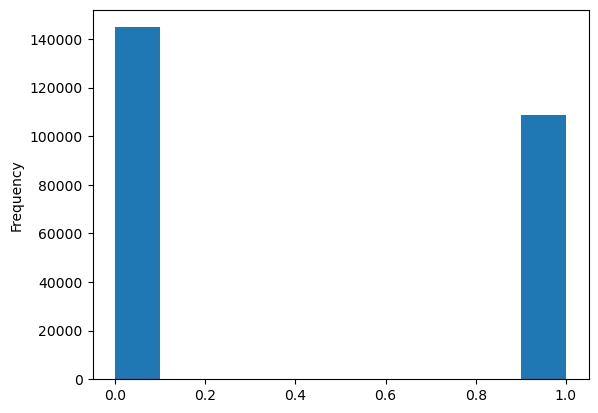

In [10]:
df['HighBP'].plot(kind='hist')

<Axes: title={'center': 'Correlation with Diabetes Prediction'}>

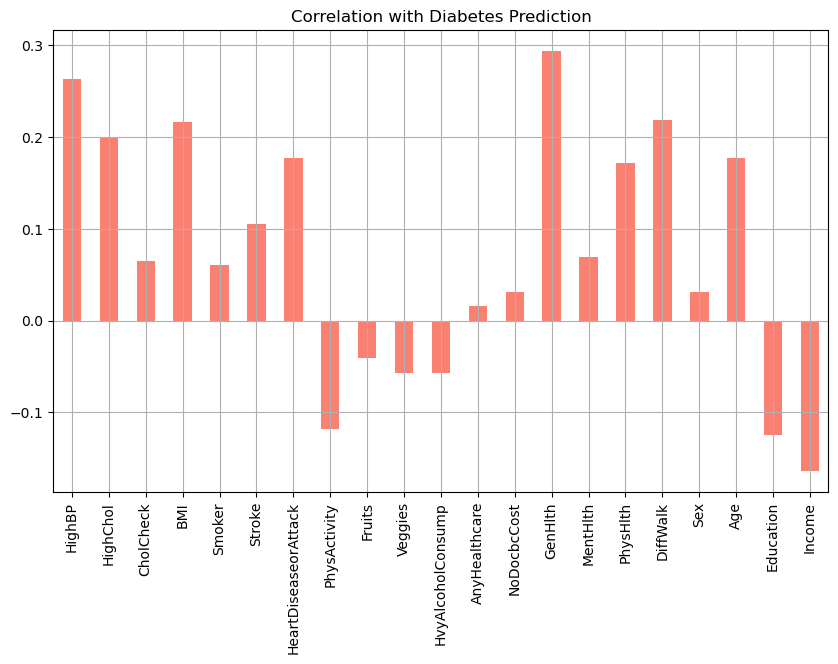

In [10]:
df.drop('Diabetes_binary',axis=1).corrwith(df.Diabetes_binary).plot(kind='bar',grid=True,figsize=(10,6),title='Correlation with Diabetes Prediction',color='salmon')

In [11]:
X=df[['BMI','HighBP']]
y=df['Diabetes_binary']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print(f"Confusion Matrix:{conf_matrix}")
print(f"Classification Report:{classification_rep}")

Accuracy:0.8597248502049827
Confusion Matrix:[[43453   286]
 [ 6831   166]]
Classification Report:              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     43739
         1.0       0.37      0.02      0.04      6997

    accuracy                           0.86     50736
   macro avg       0.62      0.51      0.48     50736
weighted avg       0.80      0.86      0.80     50736



In [14]:
new_bmi=float(input("enter BMI :"))
new_high_bp=float(input("enter 1 if high bp or 0:"))
new_data=scaler.transform([[new_bmi,new_high_bp]])
prediction=model.predict(new_data)
if prediction[0]==1:
    print("model predicts that person is diabetic")
else:
    print("model predicts that person is not diabetic")

enter BMI :25
enter 1 if high bp or 0:1
model predicts that person is not diabetic


C:\Users\tupka\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
X=df[['Stroke','HeartDiseaseorAttack']]
y=df['Smoker']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print(f"Confusion Matrix:{conf_matrix}")
print(f"Classification Report:{classification_rep}")

Accuracy:0.5804951119520656
Confusion Matrix:[[25799  2391]
 [18893  3653]]
Classification Report:              precision    recall  f1-score   support

         0.0       0.58      0.92      0.71     28190
         1.0       0.60      0.16      0.26     22546

    accuracy                           0.58     50736
   macro avg       0.59      0.54      0.48     50736
weighted avg       0.59      0.58      0.51     50736



In [18]:
new_stroke=float(input("stroke: if yes 1, no 0 :"))
new_heartdis=float(input("enter 1 if heart disease  or 0:"))
new_data=scaler.transform([[new_stroke,new_heartdis]])
prediction=model.predict(new_data)
if prediction[0]==1:
    print("model predicts that person is a smoker")
else:
    print("model predicts that person is not a smoker")

stroke: if yes 1, no 0 :1
enter 1 if heart disease  or 0:0
model predicts that person is a smoker


C:\Users\tupka\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
X=df[['Stroke','HvyAlcoholConsump']]
y=df['HighChol']

In [20]:
X_train,X_test,y_train,y_test
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print(f"Confusion Matrix:{conf_matrix}")
print(f"Classification Report:{classification_rep}")

Accuracy:0.5804951119520656
Confusion Matrix:[[25799  2391]
 [18893  3653]]
Classification Report:              precision    recall  f1-score   support

         0.0       0.58      0.92      0.71     28190
         1.0       0.60      0.16      0.26     22546

    accuracy                           0.58     50736
   macro avg       0.59      0.54      0.48     50736
weighted avg       0.59      0.58      0.51     50736



In [22]:
new_stroke=float(input("stroke: if yes 1, no 0 :"))
new_heartdis=float(input("enter 1 if heavy alcohol consumption  or 0:"))
new_data=scaler.transform([[new_stroke,new_heartdis]])
prediction=model.predict(new_data)
if prediction[0]==1:
    print("model predicts that person is having high cholestrol")
else:
    print("model predicts that person is not having high cholestrol")

stroke: if yes 1, no 0 :1
enter 1 if heavy alcohol consumption  or 0:0
model predicts that person is not having high cholestrol


In [23]:
from sklearn import metrics

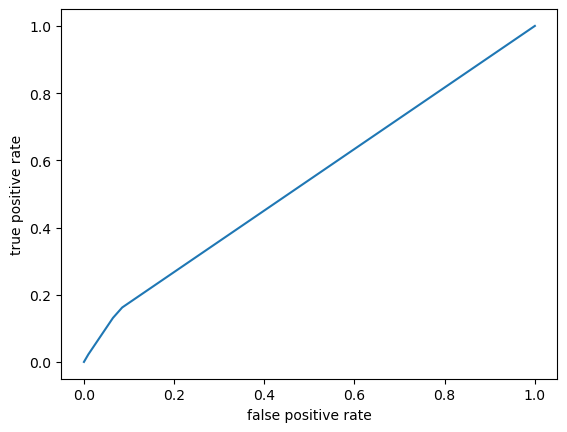

In [24]:
y_pred=model.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [25]:
columns_to_drop=['Income','Education','DiffWalk','PhysHlth','MentHlth','GenHlth','NoDocbcCost','AnyHealthcare','Fruits','Veggies']
df.drop(columns=columns_to_drop,inplace=True)

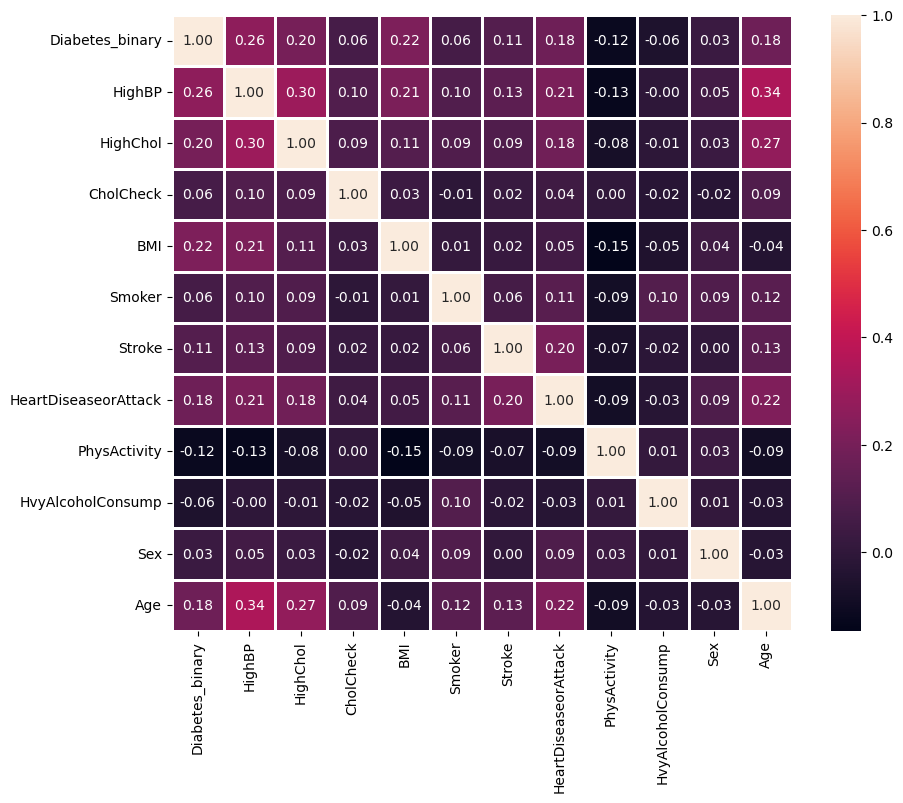

In [57]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.8,
              fmt='0.2f')

In [26]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import warnings
import plotly.express as px
px_template="simple_white"

In [27]:
data=pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv',sep=",",encoding='utf-8')
data.shape

(253680, 22)

In [28]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} colums')

The dataset has 253680 rows and 22 colums


In [56]:
data.head()
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

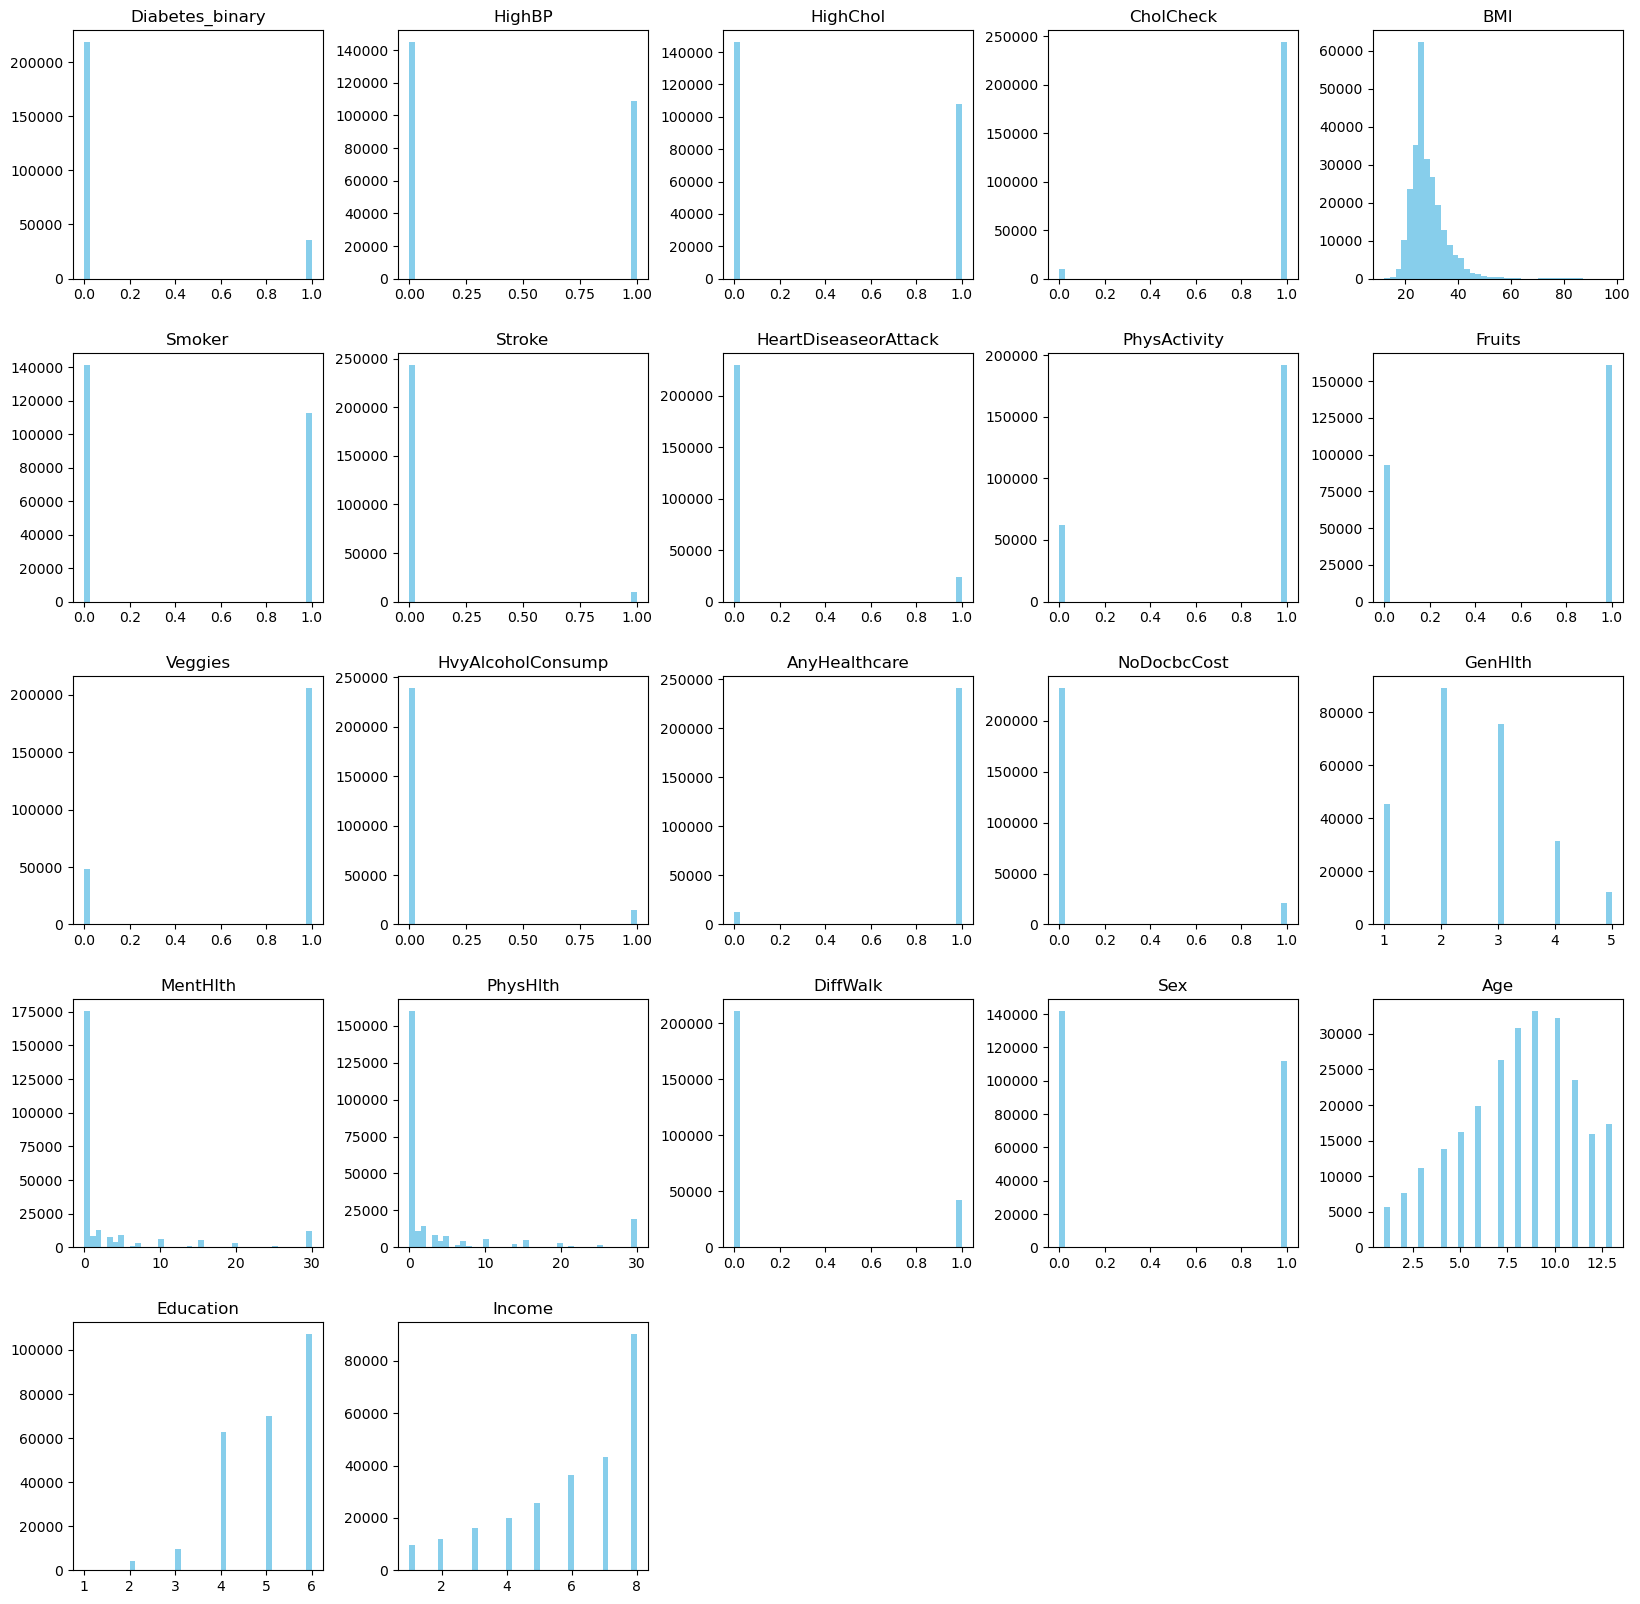

In [31]:
ax=data.hist(bins=40,grid=False,figsize=(20,20),color='skyblue')

Text(0, 0.5, 'BMI')

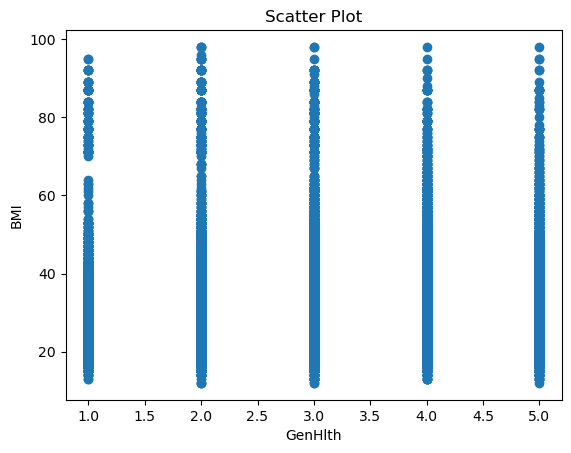

In [84]:
plt.scatter(data['GenHlth'],data['BMI'])
plt.title("Scatter Plot")
plt.xlabel('GenHlth')
plt.ylabel('BMI')

<Axes: xlabel='BMI', ylabel='Diabetes_binary'>

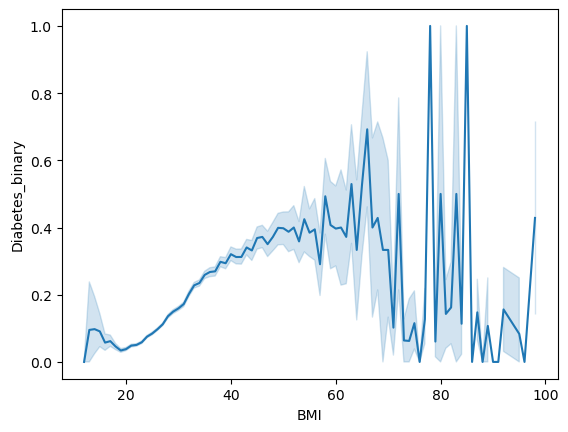

In [32]:
sns.lineplot(x='BMI',y='Diabetes_binary',data=data)

<Axes: title={'center': 'Correaltion with diabetes prediction'}>

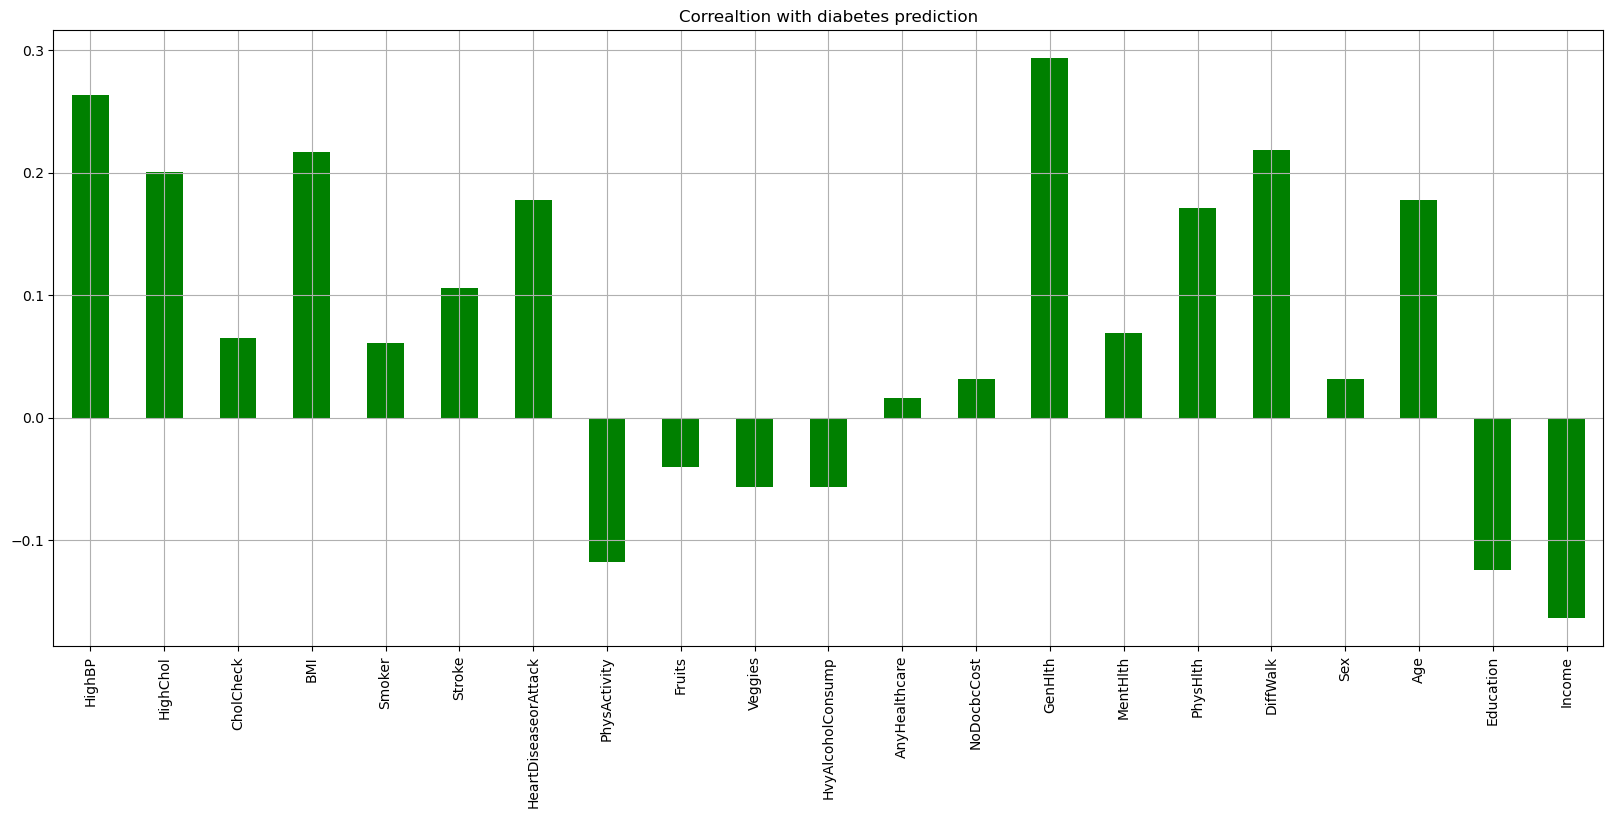

In [33]:
data.drop('Diabetes_binary',axis=1).corrwith(data.Diabetes_binary).plot(kind='bar',grid=True,figsize=(20,8),title='Correaltion with diabetes prediction',color='green')

In [ ]:
figure1,plot1=plt.subplots(1,2,figsize=(8,8))
sns.countplot(data['Diabetes_binary'],ax=plot1[0])
labels=["non-Diabetic","Diabetic"]
plt.pie(data["Diabetes_binary"])

([<matplotlib.patches.Wedge at 0x20661eb5d10>,
 [Text(-0.24332521880412825, 1.0727501283588472, 'non HighBP'),
  Text(0.24332521880412789, -1.0727501283588474, 'HighBP')],
 [Text(-0.13272284662043357, 0.5851364336502802, '57.10'),
  Text(0.13272284662043338, -0.5851364336502803, '42.90')])

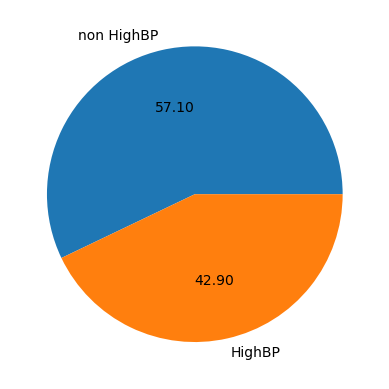

In [34]:
labels=['non HighBP','HighBP']
plt.pie(data['HighBP'].value_counts(),labels = labels, autopct='%0.2f')

Text(0, 0.5, 'Frequency')

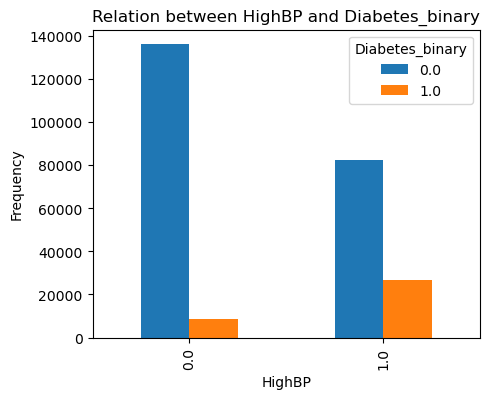

In [35]:
pd.crosstab(data.HighBP,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between HighBP and Diabetes_binary')
plt.xlabel('HighBP')
plt.ylabel('Frequency')


([<matplotlib.patches.Wedge at 0x28949d15610>,
 [Text(-0.259742719558564, 1.0688936895857892, 'non HighChol'),
  Text(0.2597426194815125, -1.0688937139046533, 'HighChol')],
 [Text(-0.14167784703194397, 0.5830329215922486, '57.59'),
  Text(0.14167779244446135, -0.5830329348570835, '42.41')])

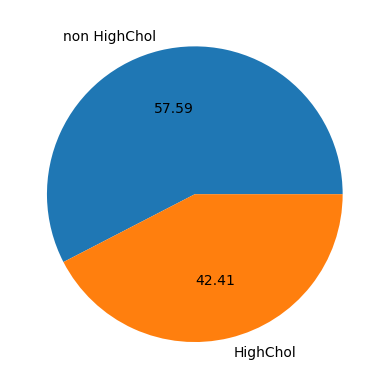

In [66]:
labels=['non HighChol','HighChol']
plt.pie(data['HighChol'].value_counts(),labels = labels, autopct='%0.2f')

Text(0, 0.5, 'Frequency')

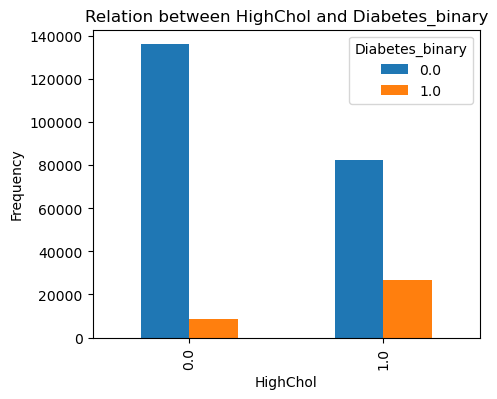

In [36]:
pd.crosstab(data.HighBP,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between HighChol and Diabetes_binary')
plt.xlabel('HighChol')
plt.ylabel('Frequency')

In [37]:
(data.groupby(['HighBP','HighChol'])['Diabetes_binary'].value_counts()/data.groupby(['HighBP','HighChol'])['Diabetes_binary'].count())*100

HighBP  HighChol  Diabetes_binary
0.0     0.0       0.0                95.811421
                  1.0                 4.188579
        1.0       0.0                89.580955
                  1.0                10.419045
1.0     0.0       0.0                83.266544
                  1.0                16.733456
        1.0       0.0                70.286112
                  1.0                29.713888
dtype: float64

Text(0.5, 1.0, 'Relation between HighBP, HighChol and Diabetes')

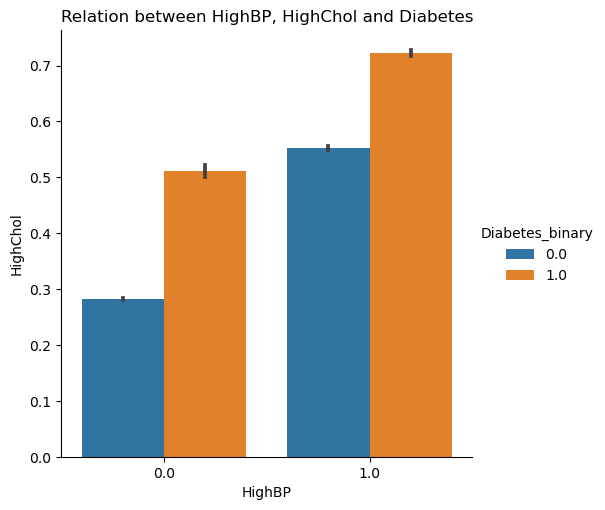

In [57]:
sns.catplot(x='HighBP',y='HighChol',data=data,hue="Diabetes_binary",kind='bar')
plt.title('Relation between HighBP, HighChol and Diabetes')

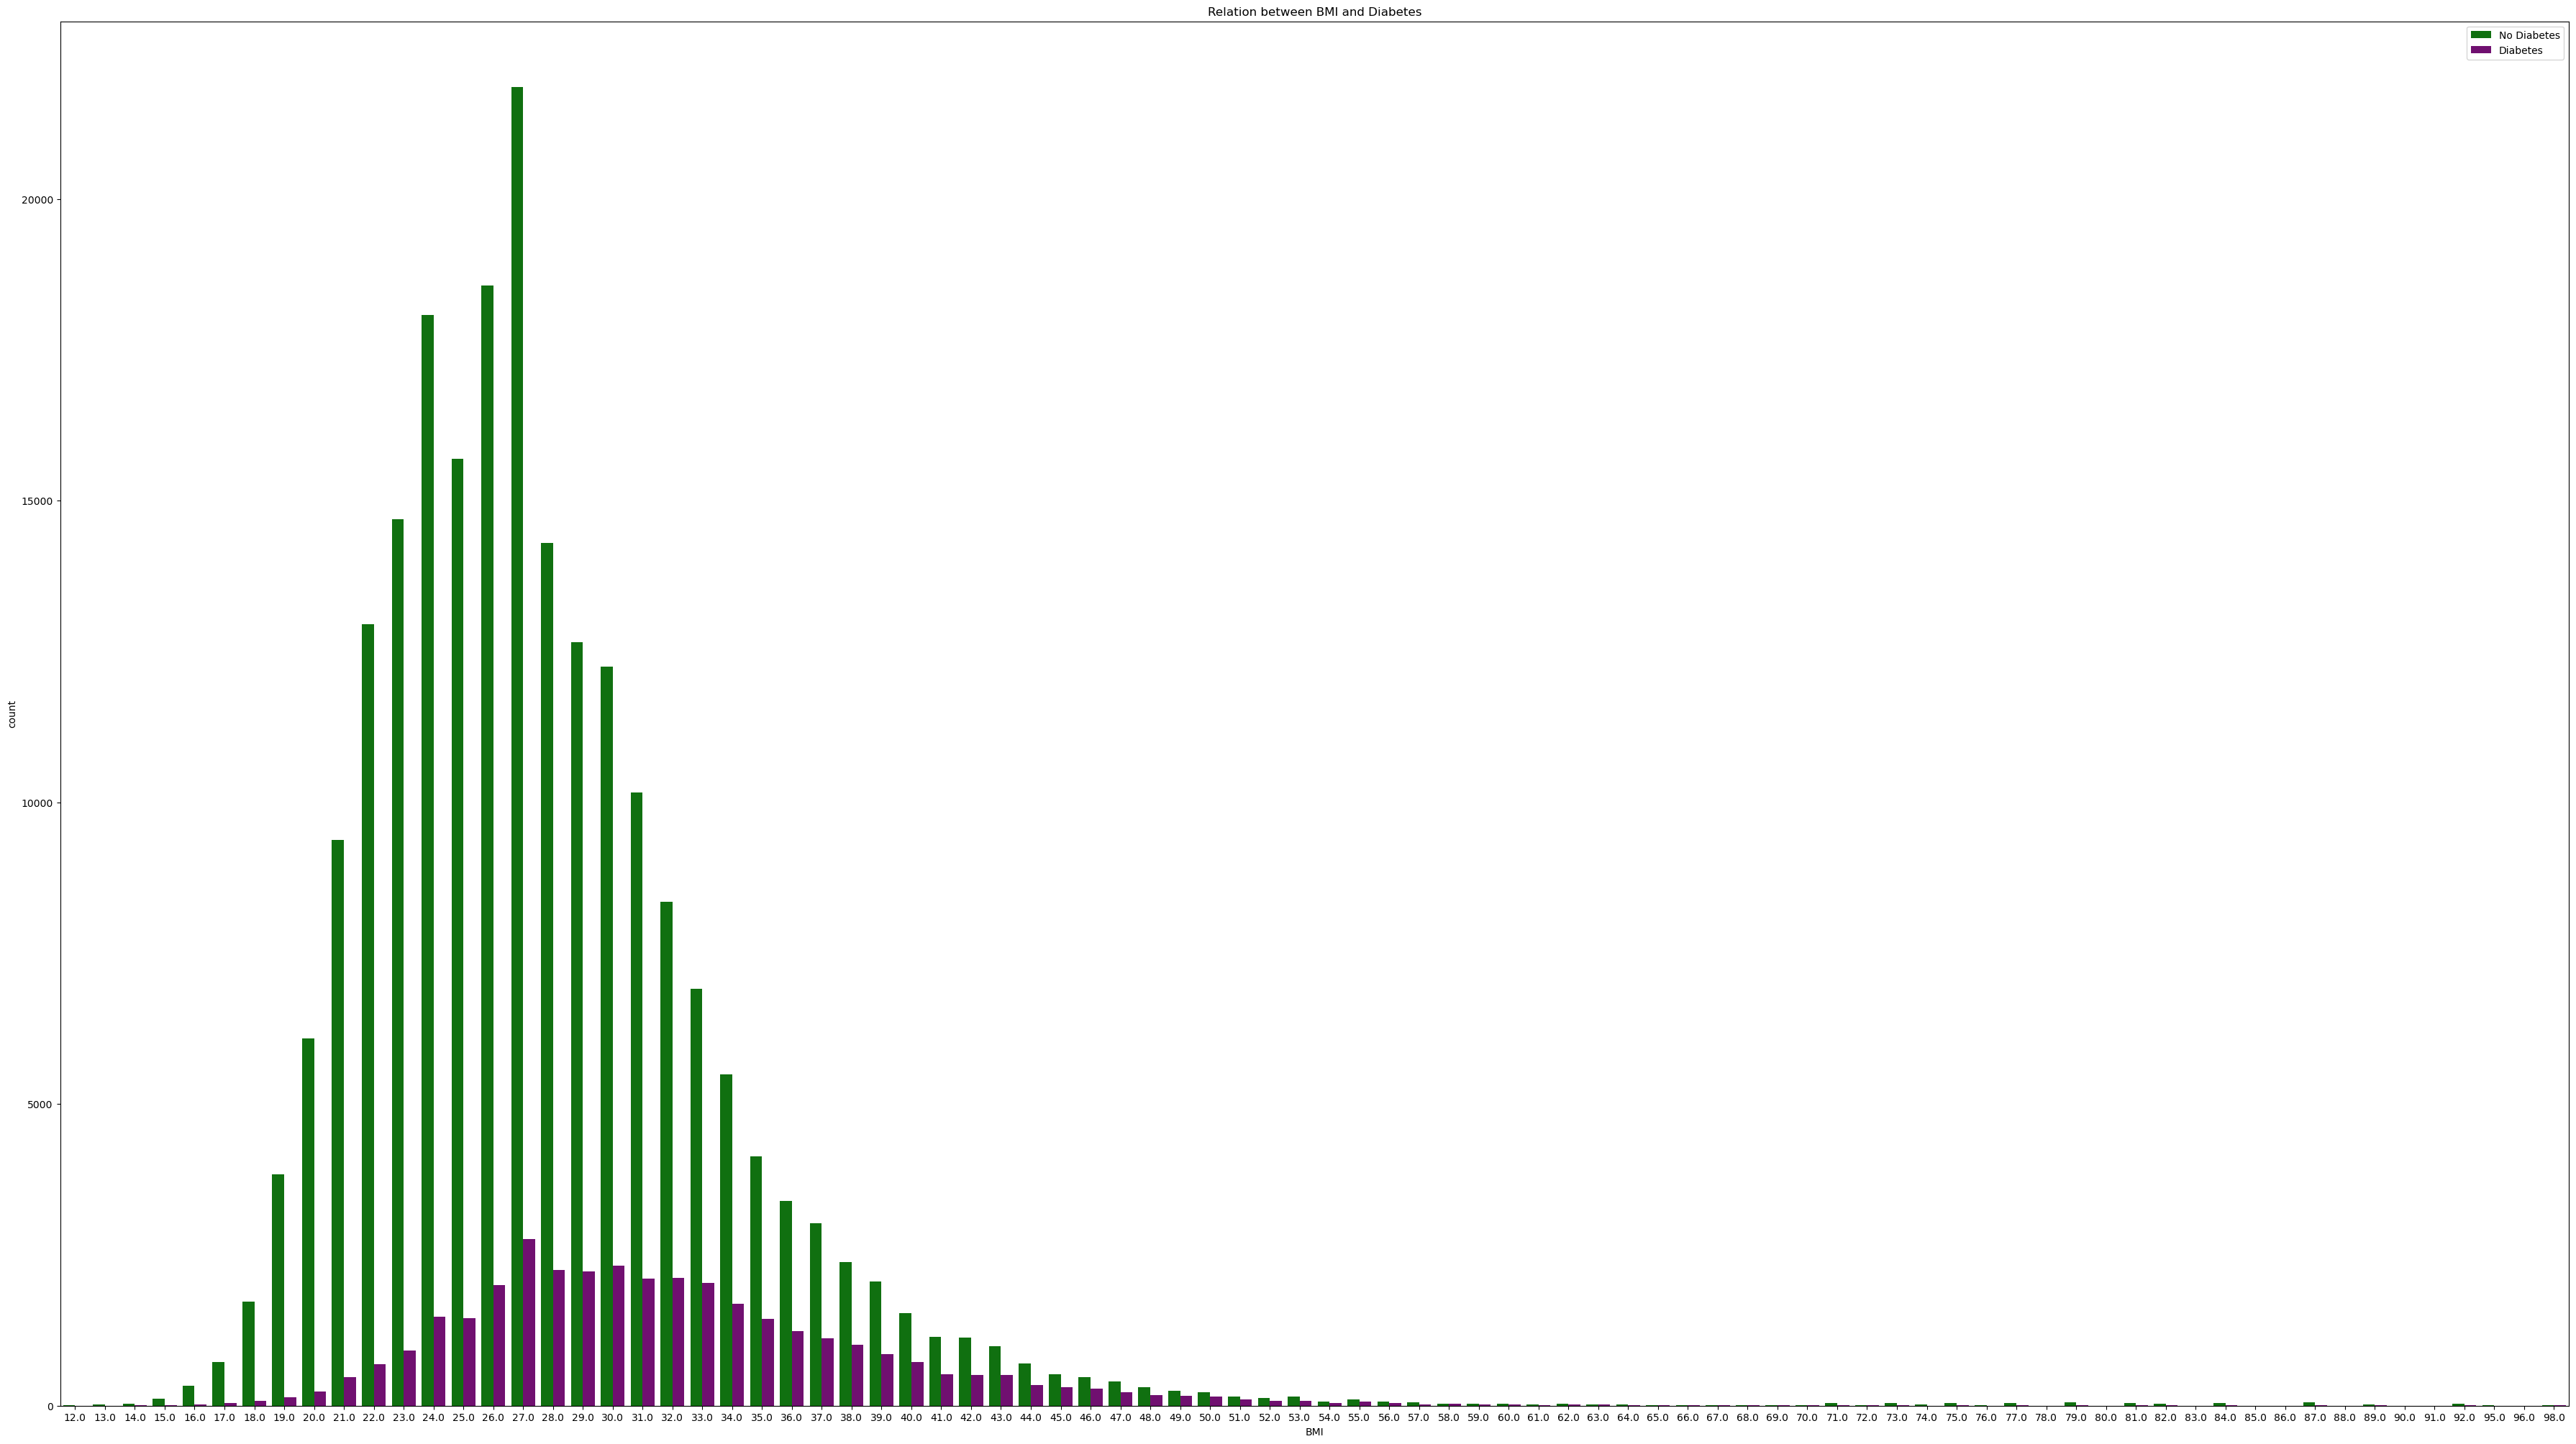

In [85]:
plt.figure(figsize=(45,25))
warnings.filterwarnings('ignore')
sns.countplot(data=df, x='BMI', hue='Diabetes_binary', palette=['green', 'purple'])
plt.title("Relation between BMI and Diabetes")
plt.legend(labels=['No Diabetes', 'Diabetes'])

([<matplotlib.patches.Wedge at 0x2064a8f36d0>,
 [Text(-0.19535353489495433, 1.082514201479152, 'non smoker'),
  Text(0.19535343354265902, -1.0825142197694653, 'smoker')],
 [Text(-0.10655647357906599, 0.590462291715901, '55.68'),
  Text(0.10655641829599581, -0.5904623016924355, '44.32')])

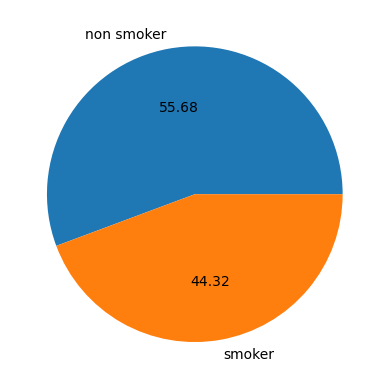

In [41]:
labels=['non smoker','smoker']
plt.pie(data['Smoker'].value_counts(),labels=labels,autopct='%0.2f')

In [42]:
pd.crosstab(data.Smoker,data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Smoker,,
0.0,124228,17029
1.0,94106,18317


Text(0, 0.5, 'Frequency')

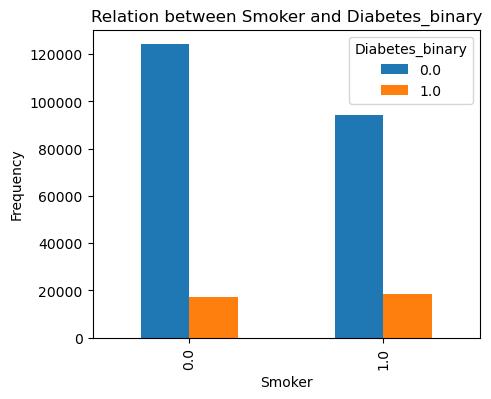

In [43]:
pd.crosstab(data.Smoker,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between Smoker and Diabetes_binary')
plt.xlabel('Smoker')
plt.ylabel('Frequency')

([<matplotlib.patches.Wedge at 0x2064a8d7750>,
 [Text(-1.0829015238677204, 0.19319495232787282, 'non HvyAlcoholConsump'),
  Text(1.082901508040527, -0.19319504104286053, 'HvyAlcoholConsump')],
 [Text(-0.590673558473302, 0.10537906490611243, '94.38'),
  Text(0.5906735498402874, -0.10537911329610573, '5.62')])

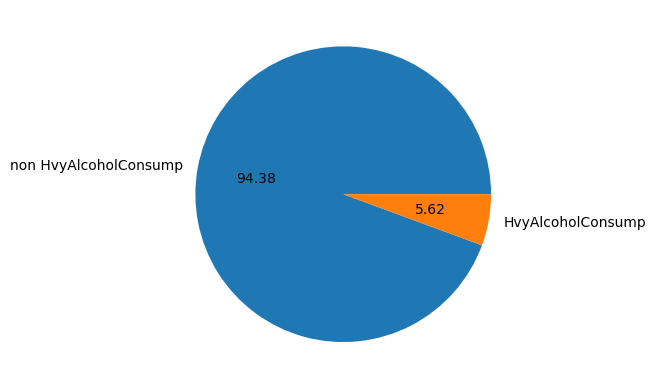

In [44]:
labels=['non HvyAlcoholConsump','HvyAlcoholConsump']
plt.pie(data['HvyAlcoholConsump'].value_counts(),labels=labels,autopct='%0.2f')

In [45]:
(data.groupby(['Smoker','HvyAlcoholConsump'])['Diabetes_binary'].value_counts()/data.groupby(['Smoker','HvyAlcoholConsump'])['Diabetes_binary'].count())*100

Smoker  HvyAlcoholConsump  Diabetes_binary
0.0     0.0                0.0                87.659612
                           1.0                12.340388
        1.0                0.0                95.730607
                           1.0                 4.269393
1.0     0.0                0.0                82.843460
                           1.0                17.156540
        1.0                0.0                93.320384
                           1.0                 6.679616
dtype: float64

Text(0.5, 1.0, 'Relation between Smoker, HvyAlcoholConsump and Diabetes')

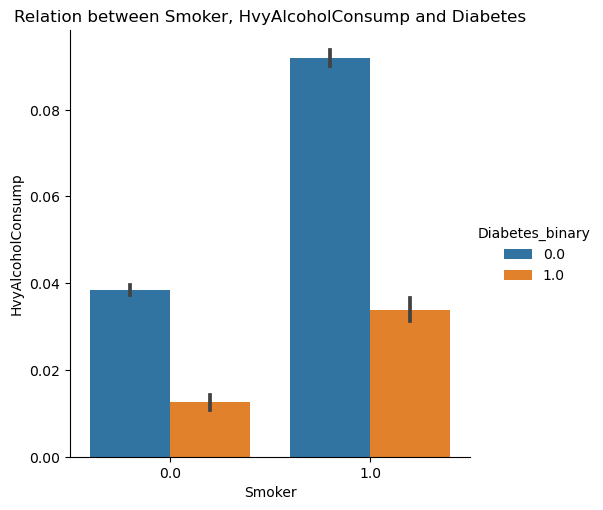

In [59]:
sns.catplot(x='Smoker', y='HvyAlcoholConsump', hue='Diabetes_binary', data=df, kind='bar')
plt.title('Relation between Smoker, HvyAlcoholConsump and Diabetes')

In [ ]:
sns.catplot(x='Stroke',y='HeartDiseaseAttack',data=data,hue="diabetes_binary",kind='bar')
plt.title('Relation between Stroke, HeartDiseaseAttack and Diabetes')

([<matplotlib.patches.Wedge at 0x20667a35f90>,
 [Text(-0.793642061018332, 0.7616641510420287, 'non PhysActivity'),
  Text(0.7936420966744032, -0.7616641138889618, 'PhysActivity')],
 [Text(-0.4328956696463629, 0.41545317329565196, '75.65'),
  Text(0.432895689095129, -0.41545315303034275, '24.35')])

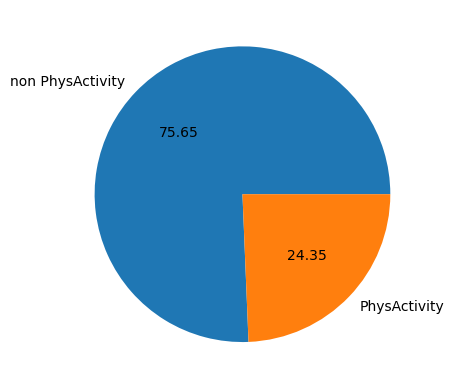

In [50]:
labels=['non PhysActivity','PhysActivity']
plt.pie(data['PhysActivity'].value_counts(),labels=labels,autopct='%0.2f')

In [51]:
pd.crosstab(data.PhysActivity,data.Diabetes_binary)

Diabetes_binary,0.0,1.0
PhysActivity,,
0.0,48701,13059
1.0,169633,22287


Text(0, 0.5, 'Frequency')

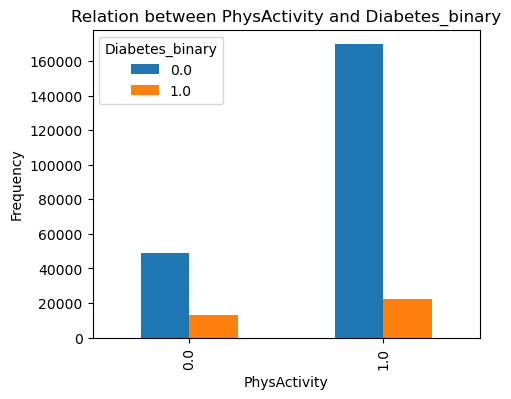

In [64]:
pd.crosstab(data.PhysActivity,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between PhysActivity and Diabetes_binary')
plt.xlabel('PhysActivity')
plt.ylabel('Frequency')

In [62]:
pd.crosstab(data.Fruits,data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Fruits,,
0.0,78129,14653
1.0,140205,20693


Text(0, 0.5, 'Frequency')

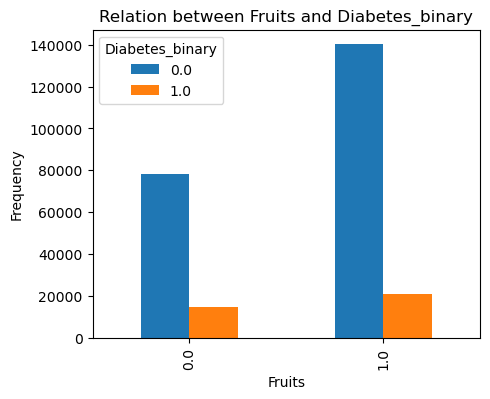

In [61]:
pd.crosstab(data.Fruits,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between Fruits and Diabetes_binary')
plt.xlabel('Fruits')
plt.ylabel('Frequency')

In [67]:
pd.crosstab(data.Veggies,data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Veggies,,
0.0,39229,8610
1.0,179105,26736


Text(0, 0.5, 'Frequency')

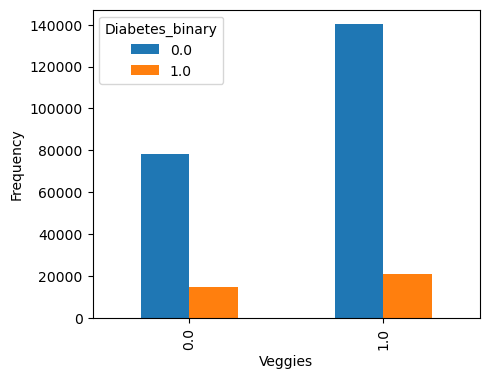

In [66]:
pd.crosstab(data.Fruits,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.xlabel('Veggies')
plt.ylabel('Frequency')

In [68]:
pd.crosstab(data.MentHlth,data.Diabetes_binary).T

MentHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,152277,7726,11546,6457,3300,7807,824,2695,529,78,...,179,52,30,27,915,38,67,270,128,9320
1.0,23403,812,1508,924,489,1223,164,405,110,13,...,48,11,8,6,273,7,12,57,30,2768


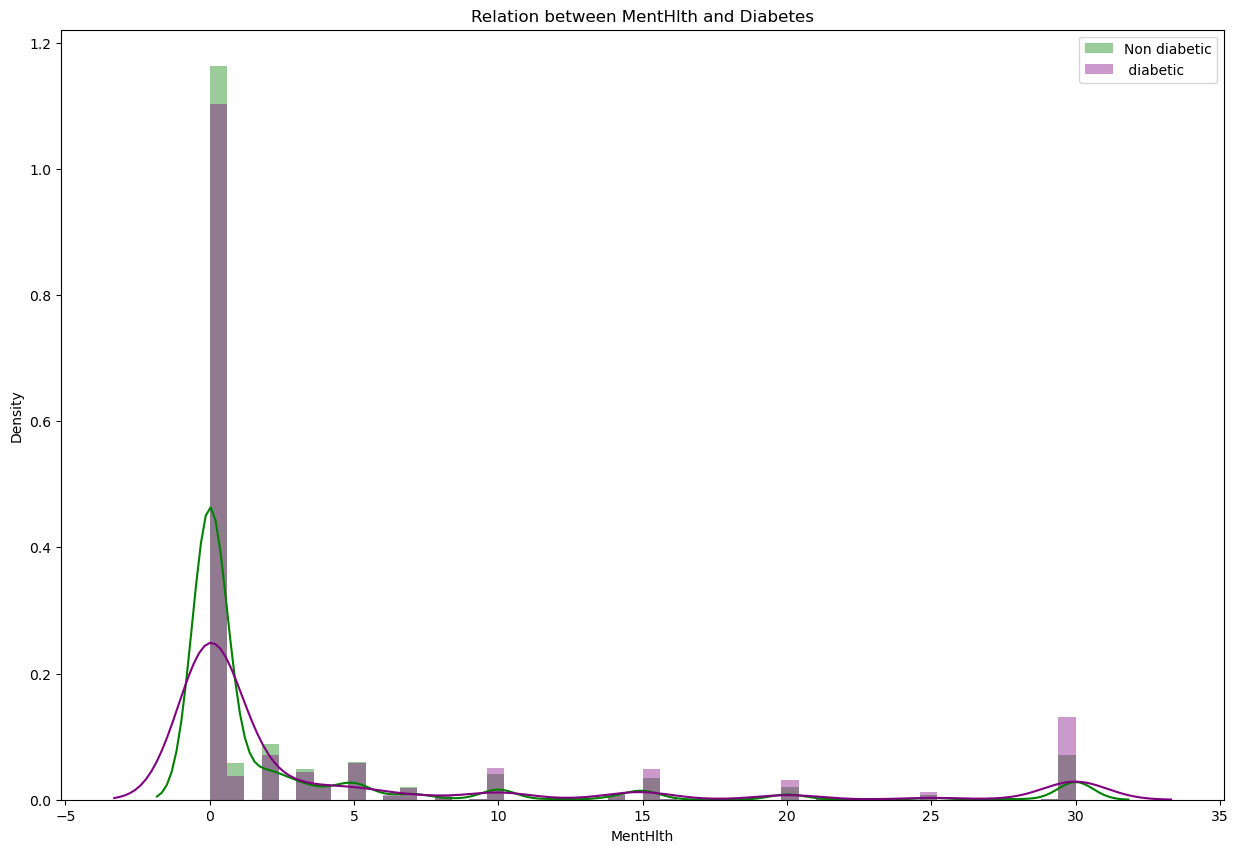

In [69]:
plt.figure(figsize=(15,10))
warnings.filterwarnings('ignore')
sns.distplot(data.MentHlth[data.Diabetes_binary==0],color='green',label='Non diabetic')
sns.distplot(data.MentHlth[data.Diabetes_binary==1],color='purple',label=' diabetic')
plt.title('Relation between MentHlth and Diabetes')
plt.legend()

In [71]:
import statsmodels
print(statsmodels.__version__)

0.14.0


In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
model=ols('HighBP ~ C(Diabetes_binary)',data=df).fit()
anova_table=sm.stats.anova_lm(model,typ=2)
print(anova_table)
alpha=0.05
if anova_table['PR(>F)']['C(Diabetes_binary)']<alpha:
    print('Reject null hypothesis-there is significant difference between HighBP in individual with and without diabetes')
else:
    print('Fail to reject null hypothesis-there is no significant difference between HighBP in individual with and without diabetes')
sqft_living_no_waterfront=df[df['Diabetes_binary']==0]['HighBP']
sqft_living_waterfront=df[df['Diabetes_binary']==1]['HighBP']
f_statistic,p_value=f_oneway(sqft_living_no_waterfront,sqft_living_waterfront)
print('F statistic:',f_statistic)
print('P-value',p_value)
alpha=0.05
if p_value<alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

                          sum_sq        df             F  PR(>F)
C(Diabetes_binary)   4302.458048       1.0  18870.365816     0.0
Residual            57838.780832  253678.0           NaN     NaN
Reject null hypothesis-there is significant difference between HighBP in individual with and without diabetes
F statistic: 18870.365815977417
P-value 0.0
Reject null hypothesis


In [86]:
import plotly.graph_objects as gp
import os

In [87]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0


In [88]:
df.shape

(253680, 12)

In [89]:
df.dropna() #drop rows with NaN values

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0


In [90]:
df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,10.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,11.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0


In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc

In [93]:
Xs=df.drop(columns='Diabetes_binary')
ys=df['Diabetes_binary']
X_train,X_test,y_train,y_test=train_test_split(Xs,ys,test_size=0.2,random_state=42)

In [94]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [98]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 86.24%


In [101]:
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
print('\nClassification Report:\n',classification_report(y_test,y_pred))

Confusion Matrix:
 [[43127   612]
 [ 6367   630]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43739
         1.0       0.51      0.09      0.15      6997

    accuracy                           0.86     50736
   macro avg       0.69      0.54      0.54     50736
weighted avg       0.82      0.86      0.82     50736



In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix,roc_curve,auc

In [103]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [104]:
y_rpred=rf.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [105]:
y_rpred

array([0., 0., 0., ..., 0., 0., 0.])

In [106]:
y_test

219620    0.0
132821    0.0
151862    0.0
139717    0.0
239235    0.0
         ... 
169513    1.0
182415    0.0
109739    0.0
181671    0.0
202118    0.0
Name: Diabetes_binary, Length: 50736, dtype: float64

In [115]:
name='Random Forest'
accuracy=accuracy_score(y_test,y_rpred)
precision=precision_score(y_test,y_rpred)
recall=recall_score(y_test,y_rpred)
f1=f1_score(y_test,y_rpred)
roc_auc=roc_auc_score(y_test,y_rpred)
print(f'Classifier: {name}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 SCORE: {f1}')
print(f'ROC AUC SCORE: {roc_auc}')
print('-----------------------------------------------')
name='Logistic Regression'
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
print(f'Classifier: {name}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 SCORE: {f1}')
print(f'ROC AUC SCORE: {roc_auc}')

Classifier: Random Forest
Accuracy: 0.8516438032166509
Precision: 0.40097159940209265
Recall: 0.15335143632985565
F1 SCORE: 0.221854646955443
ROC AUC SCORE: 0.5583511108350849
-----------------------------------------------
Classifier: Logistic Regression
Accuracy: 0.8624448123620309
Precision: 0.5072463768115942
Recall: 0.09003858796627126
F1 SCORE: 0.15293118096856415
ROC AUC SCORE: 0.5380232492633203
